## K-means에 대한 정의. 

+ 데이터 군집에 사용되는 비지도학습 알고리즘
* 일반적인 군집화에서 가장 많이 사용
+ 알고리즘이 쉽고 간결
+ 반복 수행시 횟수가 많아지면 수행시간이 길어지고 매우 느려진다
+ 몇 개의 군집이 좋을 지 가늠하기 어려울 수 있음.
+ 서로 유사성은 높은 것기리 관측값을 묶어 다수의 그룹을 만드는 알고리즘
+ 즉, 동일 그룹내 구성원끼리는 유사성이 높고 다른 그룹내 구성원과의 유사성은 거의 없다는 의미.
+ 군집기반 알고리즘, SSW, SSB.

## 군집의 유형

+ 군집화 알고리즘은 Kmeans,DBSCAN, Hierarchical clustering, Spectral Clusering등 여러가지 기법이 있다.
+ 알고리즘의 특성에 따라 속도나 성능에 차이가 있기 때문에, 데이터 모양에 따라서 적절한 클러스터링 알고리즘을 찾는게 중요.

## 지도학습 vs 비지도학습 
* 지도학습 : 데이터와 레이블을 이용해서 규칙/패턴 파악. 
* 비지도 학습 : 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악. (합친다. 라는 개념으로 파악하면 됨.)

## 유사도 파악
* kmeans에서는 각 점간의 거리가 가까울수록 비슷한 특성을 가진다고 보고 데이터들을 모음(군집함)
* 따라서, 유사도 측정을 위해 임의의 기준점을 centoroid를 선정. 
* centoroid란 기하학에서의 무게중심을 뜻한다. 
* 기하학에서, 무게 중심은 주어진 도형 속 모든 점의 산술 평균이 되는 점이다. 
* 이는 도형을 밀도가 균일한 물체로 보았을 때 물리학에서의 무게 중심과 일치한다.
* 

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 데이터 정의

x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

# 시각화를 실시한다.

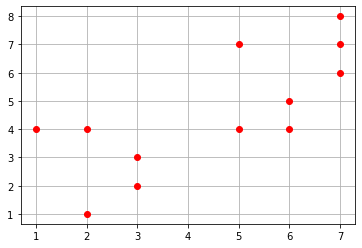

In [16]:
plt.plot(x,y, 'ro') # 기본적인 시각화 명령어는 plt.plot(, 빨간 점을 활성화할려면 'ro', 그리드 써줄려면 plt.grid() )
plt.grid()

# 임의의 센터로이드 설정
# -> C1(1,4), C2(7,8)

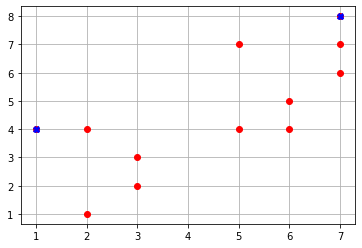

In [18]:
# 임의의 센터로이드를 추가하니 7,8번 라인, 4,1번 라인에 색깔이 다른 점들이 표시되었다.

plt.plot(x,y, 'ro') 
plt.plot([1,7], [4,8], 'bX')
plt.grid()

#### 센터로이드와 각 점들간 거리 계산 : 유클리드 거리 계산. 
#### 즉, A(X1, Y1)와 B(X2, Y2)간의 거리를 계산할려면 
#### sqrt (X2-X1)^2 + (X2-Y1)^2로 함.
#### 요거시 유클리드 거리 계산 - sqrt 
#### https://ko.wikipedia.org/wiki/%EC%A0%9C%EA%B3%B1%EA%B7%BC 여기 참고

#### 2,4와 6,4는 어디와 가까운가?

In [27]:
### C(2,4)와 D(6,4)는 A,B 중 어디와 가까운가? 이 문제를 풀어보도록 하자.

C = np.array((2,4))
D = np.array((6,4))

## np.array값을 넣어주고, numpy 모듈을 사용하여 수학 공식을 직접 구현할 수도 있다. 
## 이 메서드의 경우 요소의 합을 반환하는numpy.sum()함수를 사용하고numpy.square()함수는 요소의 제곱을 반환한다.

dist = np.sqrt(np.sum(np.square(C-D)))

### np.array값을 넣어주고, numpy 모듈을 사용하여 수학 공식을 직접 구현할 수도 있다. 
### 이 메서드의 경우 요소의 합을 반환하는
### numpy.sum() 함수를 사용하고 numpy.square()함수는 요소의 제곱을 반환한다.

In [28]:
print(dist)

4.0


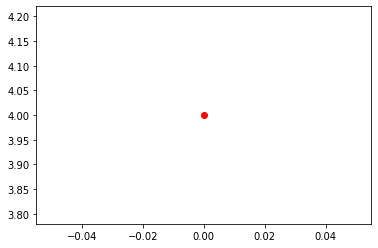

In [30]:
plt.plot(dist,'ro') 

In [33]:
# 강사님의 풀이 방법.
# C(2,4와 D(6,4는 A(1,4), B(7,8) 중 어디와 가장 가까운가?
# math.sqrt 함수를 이용한다.

math.sqrt((1-2)**2 + (4-4)**2) # A ~ C, = 1

1.0

In [39]:
math.sqrt((1-6)**2 + (4-4)**2) # B ~ C, = 5

5.0

In [35]:
math.sqrt((7-2)**2 + (8-4)**2) # B ~ C, = 6.4 : 6.4

6.4031242374328485

In [37]:
math.sqrt((7-6)**2 + (8-4)**2) # B ~ D, = 4.1

4.123105625617661

### -> C2로 분류. 다 됬으면 이제 새로운 중심점을 옮겨야겠죠?
### 새로운 중심점 설정. (센터로이드)
* 모든 데이터에 대한 군집화가 수행된 후 
  새로운 중심점을 선정한 후 다시 유사도에 의한 군집 실시.
* 새로운 중심점을 선정하는 방버은 각 군집별 평균값을 이용
* 즉, 군집 C1, C2의 (C는 센터로이드를 의미) 각  x/y 좌표간 평균계산.)
 + C1의 새로운 좌표
   + x좌표 : 1,2,2,3,3 / 5 로 나누게 되면 = 2.2가 나올 겁니다.
   + y좌표 : 1,2,3,4,5 / 5 = 2.8이 될겁니다. 그럼 이 좌표가 새로운 센터로이드를 의미한다는걸  꼭 기억합시다.
   + 따라서 좌표는 A(1,4) -> (2.2, 2.8)
   + C2의 새로운 좌표
     + x좌표 :
     - y좌표 :
     - (7,8) -> ()

In [40]:
C2 = np.array((7,8))

distC2 = np.sqrt(np.sum(np.square(C2)))

print(distC2)

10.63014581273465


## 강사님의 풀이 방법.
 + x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
 + y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85
    - (7,8) - > (6.14, 5.85)

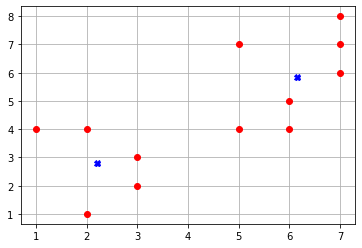

In [41]:
## 새로운 좌표 시각화
plt.plot(x,y, 'ro')
plt.plot([2.2, 6.14],[2.8, 5.85], 'bX')
plt.grid()

#### 여기서 시각화한 결과값이 별로 차이가 없으면 중단한다고 보면 된다.

In [58]:
## iris 데이터셋을 Kmeans로 군집화하기

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 해당 3개의 데이터셋 사용.

In [60]:
# 데이터 적재 및 분할
iris = load_iris()

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify = iris.target, random_state=2111151105)

In [61]:
# 군집분석 실시
# n_clusters : 군집수
# max_iter : 군집화 시도횟수

kms = KMeans(n_clusters=3, max_iter=100) ##  max_iter는 학습의 최대 반복횟수를 의미한다. 

kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

In [62]:
# 군집 결과 평가 : 객체명 : labels_에 저장되어 있음.

kms.labels_

array([2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 0])

### 어떤 녀석은 1번, 0번, 2번그룹으로 속해있다는 걸 알게 될 것이다.
### 우리가 시험을 하기 위해서 중간에 정답이 있는 데이터를 가져다 본다는 것에 의의를 둬야 한다.

In [64]:
# 정확도 보기

accuracy_score(kms.labels_, ytrain) # 0.42도 나오고 0.90도 나오고

0.8857142857142857

In [68]:
# 군집 분석
kms.fit(Xtest)

# y테스트값도 보자.
accuracy_score(kms.labels_, ytest) 

#0.44, 0, 033, ...

0.28888888888888886

In [71]:
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

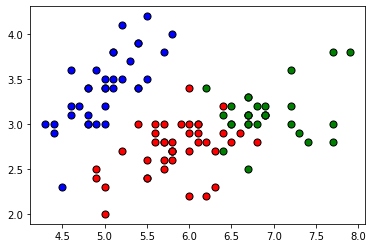

In [78]:
## 군집 시각화1

plt.scatter(Xtrain[kms.labels_ == 0,0],
           Xtrain[kms.labels_ == 0,1], s=50,
           marker = 'o', c ='r', edgecolors='k')

## 군집 시각화2

plt.scatter(Xtrain[kms.labels_ == 1,0],
           Xtrain[kms.labels_ == 1,1], s=50,
           marker = 'o', c ='b', edgecolors='k')

## 군집 시각화3

plt.scatter(Xtrain[kms.labels_ == 2,0],
           Xtrain[kms.labels_ == 2,1], s=50,
           marker = 'o', c ='g', edgecolors='k')

## 중심점을 찍는다고 했죠? 중심점은 어디 있는지 함 봅시다. 

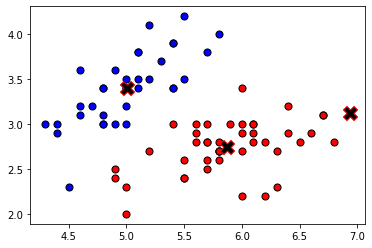

In [81]:
## 군집 시각화1

plt.scatter(Xtrain[kms.labels_ == 0,0],
           Xtrain[kms.labels_ == 0,1], s=50,
           marker = 'o', c ='r', edgecolors='k')

## 군집 시각화1

plt.scatter(Xtrain[kms.labels_ == 1,0],
           Xtrain[kms.labels_ == 1,1], s=50,
           marker = 'o', c ='b', edgecolors='k')   

## 군집 시각화1

plt.scatter(kms.cluster_centers_[:,0],
           kms.cluster_centers_[:,1], s=200,
           marker = 'X', c ='k', edgecolors='r')

In [111]:
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=10)

### 최종적으로 군집점은 이렇게 되었다는 것입니다. 
### 요걸 보신다면 plt.scatter 함수를 세번 써서 작성했는데, 반복문으로 줄여서 간단하게 작성할 수도 있을 것이다.

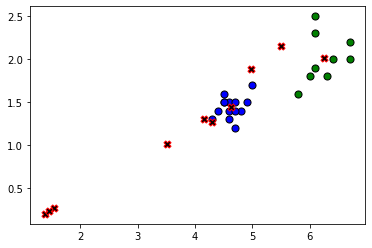

In [112]:
## 군집 시각화2

plt.scatter(Xtrain[kms.labels_ == 1,2],
           Xtrain[kms.labels_ == 1,3], s=50,
           marker = 'o', c ='b', edgecolors='k')

## 군집 시각화2

plt.scatter(Xtrain[kms.labels_ == 2,2],
           Xtrain[kms.labels_ == 2,3], s=50,
           marker = 'o', c ='g', edgecolors='k')   

## 군집 중심점은 객체명.cluster_centers_에 저장되어 있음.

plt.scatter(kms.cluster_centers_[:,2],
           kms.cluster_centers_[:,3], s=50,
           marker = 'X', c ='k', edgecolors='r')

In [ ]:
## 서로 다른 군집들끼리는 멀리 떨어져 있는게 좋다. 같은 것들은 군집이 붙어있는 거이 좋다.

In [113]:
# 군집 분석
kms.fit(Xtest)
accuracy_score(kms.labels_, ytest)
# 0.44, 0, 0.33, ...

0.28888888888888886

In [114]:
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=10)

In [115]:
## 군집 분석. 지도학습의 모델평가는 정확도라든지, 정밀도라든지, 군집 비지도학습같은 경우는 고유의 모델과 특성이 있다.
## 여기에는 실루엣 계수라는게 있다. 군집 정도가 군집이 잘되었는지 안되었는지, 확인할 수 있다는 것이다.

# 군집 성능 평가
# 실루엣 계수 : 군집 적합도를 수치로 나타낸 것
# 1에 가까울수록 군집이 잘된것으로 파악.

silhouette_score(Xtrain, kms.labels_, metric='euclidean')
# 0.568

0.3589892189313403

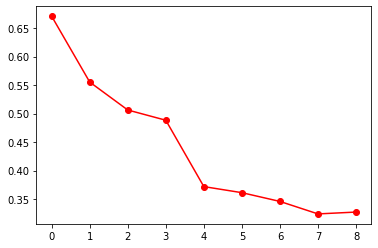

In [116]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인

sss = []

for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtrain)
    ss = silhouette_score(Xtrain, kms.labels_,
                         metric='euclidean')
    sss.append(ss)
plt.plot(sss, 'ro-')

In [117]:
kms.fit(Xtest) 

KMeans(max_iter=100, n_clusters=10)

## 기억할 것 ! kms.fit 값을 꼭 해당 값으로 입력해주고 시각화를 실행해야 한다. kms.fit(Xtest인지, Xtrain인지)

### 여기서 잠깐!
                  + 엘보우 계수 : 군집화가 된 후 각 중싱점에서 군집 데이터간의 거리를 합산한 값 
                  + 군집 데이터간의 거리를 합산한 값
                  + 군집이 어느정도로 잘되어 있는지를 나타내는 값
                     이 값이 작을수록 군집의 응집이 높다는 의미.
                  + 객체명.inertia_

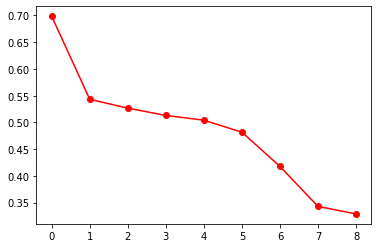

In [118]:
sss = []

for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_,
                         metric='euclidean')
    sss.append(ss)
plt.plot(sss, 'ro-')

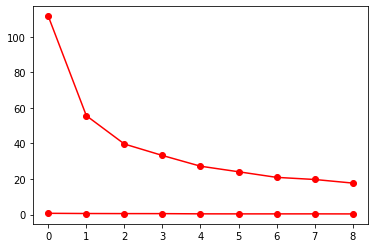

In [120]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인

sss = []
els = []

for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtrain)
    ss = silhouette_score(Xtrain, kms.labels_,
                         metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)
plt.plot(sss, 'ro-')

# 실루엣 계수(sss)만으로는 적절한 군집의 수를 파악하기 어려움.

plt.plot(els, 'ro-')

# 엘보우계수(els) 로는 적절한 군집의 수를 파악하기에 다소 쉬운편.


### 실루엣 계수(sss)만으로는 적절한 군집의 수를 파악하기 어려움.
### 엘보우계수(els) 로는 적절한 군집의 수를 파악하기에 다소 쉬운편.
### 즉, 엘보우 계수값이 급변하는 구간의 k값이 적절한 군집수로 인식함.

### 이 표를 보면 2,3,4이 3개의 값이 무난하다고 보면 될 것 같다.
### interia (관성)은 방향의 변화를 포함한 운동 상태의 변화에 대한 물리적 물체의 저항이다. 
    + 운동을 설명하는 것은 고전 물리학의 가장 중요한 원리 중 하나이다.

## 강사님이 주신 데이터로 군집을 돌려보자.
 + 학생성적과 집중도를 기준으로 클래스를 나눌려고 할 때 몇 개의 반으로 나누는 것이 좋을지 알아보세요.
 + http://naver.me/5NLKt35W

In [123]:
academy = pd.read_csv('academy.csv', encoding='cp949') 

# UTF-8 에러가 날 때는 encoding='cp949' 코드를 집어넣으면 된다. 간단한 해결법, 기억하자.

In [127]:
# 데이터 읽어들이기.

academy.head(51) # 총 헤드 값.

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90
5,6,90,92,90,96,100
6,7,65,70,66,76,70
7,8,60,90,70,98,80
8,9,46,56,43,55,60
9,10,88,67,90,70,70
